## belosgraficos instagram.com/belosgraficos/
### Notebook para a criação de gráficos do preço das ações das 5 Big Techs.
Comentários estão em português - Comments are in Portuguese

Notebook criado utilizando o Kaggle Dados: Google Finanças

In [1]:
# Importando as bibliotecas necessárias para a execução do código
library(dplyr)
library(ggplot2)
library(png)
library(ggthemes)
library(tidyr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# Lendo o arquivo de dados
dataset <- read.csv("../input/cmce-nike/nike.csv", sep = ';')
dataset$Date <- as.Date(dataset$Date, format = "%d/%m/%Y")
head(dataset)

,Date,Preço
,<date>,<dbl>
1,2020-02-03,99.27
2,2020-02-04,101.38
3,2020-02-05,100.54
4,2020-02-06,100.27
5,2020-02-07,99.44
6,2020-02-10,100.02


Criando o gráfico

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


png 
  2

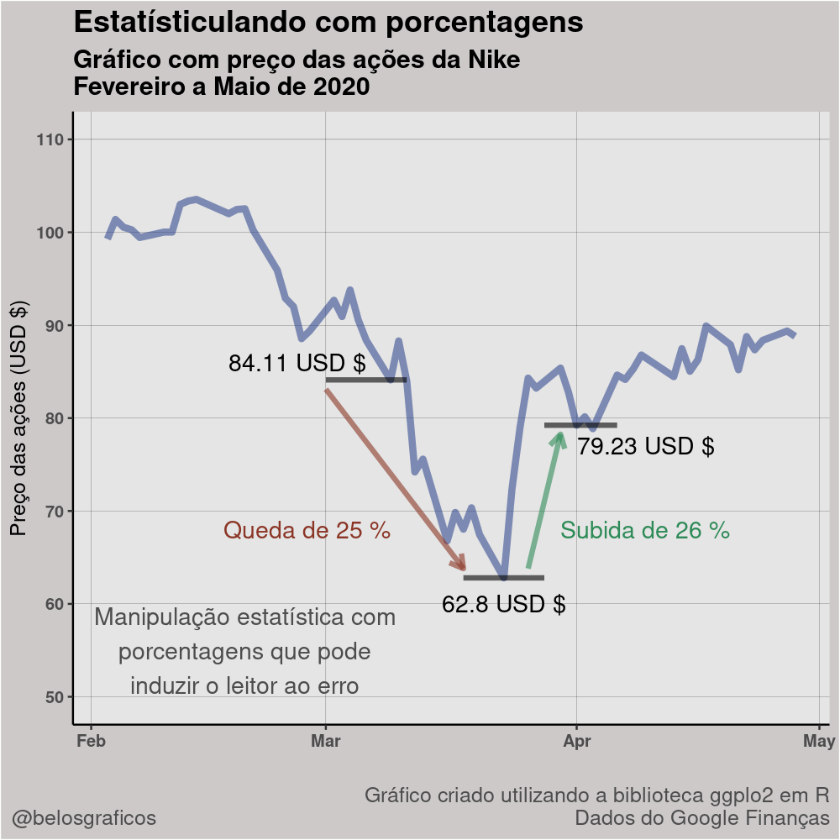

In [70]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "2021-07-05 nike-acoes.png"
fig_width = 1000
fig_height = 1000

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(dataset, aes(x = Date)) +

# Adicionando camadas com plots de área
geom_line(aes(y = Preço, alpha = 0.7), color = 'royalblue4', size = 4) +

# Definindo o tema
theme_classic(base_size = 25) +
theme(legend.position = "", # Remove a legenda
        
      # Título dos eixos em negrito
      axis.text.x = element_text(face = "bold"), 
      axis.text.y = element_text(face = "bold"),
        
      # Título e subtitulo do gráfico centralizados e em negrito
      plot.title = element_text(hjust = 0, face = "bold", size = 36),
      plot.subtitle = element_text(hjust = 0, face = "bold", size = 30),
        
      # Cores de fundo da figura e da área do gráfico
      plot.background = element_rect(fill = "snow3"),
      panel.background = element_rect(fill = "gray90"),
      panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "black"),
                
      # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
      plot.caption = element_text(color = 'gray30', hjust = c(-0.1,1), size = 25)) +

# Definições do eixo Y
scale_y_continuous(breaks = seq(50, 110, by = 10), 
                   limits = c(50, 110)) +

# Linhas e textos auxiliares
annotate("text",
         x = as.Date("2020-03-06"), y = 86,
         label = "84.11 USD $",
         hjust = 1, size = 10, color = "black") +
annotate("segment", x = as.Date("2020-03-01"), xend = as.Date("2020-03-11"),
         y = 84.11, yend = 84.11, colour = "black",
         size=3, alpha=0.6) +

annotate("text",
         x = as.Date("2020-04-01"), y = 77,
         label = "79.23 USD $",
         hjust = 0, size = 10, color = "black") +
annotate("segment", x = as.Date("2020-03-28"), xend = as.Date("2020-04-06"),
         y = 79.23, yend = 79.23, colour = "black",
         size=3, alpha=0.6) +

annotate("text",
         x = as.Date("2020-03-23"), y = 60,
         label = "62.8 USD $",
         hjust = 0.5, size = 10, color = "black") +
annotate("segment", x = as.Date("2020-03-18"), xend = as.Date("2020-03-28"),
         y = 62.8, yend = 62.8, colour = "black",
         size=3, alpha=0.6) +


# Setas
annotate("segment", x = as.Date("2020-03-01"), xend = as.Date("2020-03-18"),
         y = 83.11, yend = 63.8, colour = "tomato4",
         size=3, alpha=0.6, arrow = arrow()) +
annotate("text",
         x = as.Date("2020-03-09"), y = 68,
         label = "Queda de 25 %",
         hjust = 1, size = 10, color = "tomato4") +

annotate("segment", x = as.Date("2020-03-26"), xend = as.Date("2020-03-30"),
         y = 63.8, yend = 78.26, colour = "seagreen4",
         size=3, alpha=0.6, arrow = arrow()) +
annotate("text",
         x = as.Date("2020-03-30"), y = 68,
         label = "Subida de 26 %",
         hjust = 0, size = 10, color = "seagreen4") +

annotate("text",
         x = as.Date("2020-02-20"), y = 55,
         label = "Manipulação estatística com\nporcentagens que pode\ninduzir o leitor ao erro",
         hjust = 0.5, size = 10, color = "gray30") +

# Definição dos labels
labs(x = "", 
     y = "Preço das ações (USD $)", 
     title = "Estatísticulando com porcentagens",
     subtitle = "Gráfico com preço das ações da Nike\nFevereiro a Maio de 2020",
     caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nDados do Google Finanças"))
  

# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)